<a href="https://colab.research.google.com/github/ridhimagarg/PyTorchBook/blob/main/Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=7258412e0e0d65aae93dfcd0e91c028fe0fcc775363984af9abfabdd8ce1a74a
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

## Gradient Descent

In [3]:
true_b = 1
true_w = 2
N = 100
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)
# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Step 0: Random Initialization

In [4]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


###Step 1: Compute Prediction

In [5]:
yhat = b + w*x_train

### Step 2: Compute Loss

In [6]:
error = (yhat - y_train)

loss = (error **2).mean()
print(loss)

2.7421577700550976


### Step 3: Compute Gradients

In [7]:
b_grad = 2*error.mean()
w_grad = 2*(x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Step 4: Update parameters

In [8]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
print(b, w)
# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


In [9]:
epochs = 1000

for epoch in range(epochs):
  yhat = b + w*x_train

  error = (yhat - y_train)

  loss = (error **2).mean()
  print(loss)

  b_grad = 2*error.mean()
  w_grad = 2*(x_train * error).mean()
  print(b_grad, w_grad)

  # Sets learning rate - this is "eta" ~ the "n"-like Greek letter
  lr = 0.1
  print(b, w)
  # Step 4 - Updates parameters using gradients and
  # the learning rate
  b = b - lr * b_grad
  w = w - lr * w_grad


print(b, w)

1.634931811122577
-2.262574433384231 -1.429787293265587
[0.80119529] [0.04511107]
1.0068190845226028
-1.6749563866841595 -1.1253465962700275
[1.02745273] [0.1880898]
0.6495106980518054
-1.2336290955964906 -0.8957319827132959
[1.19494837] [0.30062446]
0.44529613860650696
-0.9022639584692401 -0.7223763357344006
[1.31831128] [0.39019766]
0.3276590367375299
-0.6535525340798871 -0.5913224154790631
[1.40853768] [0.46243529]
0.25901116498633575
-0.4669669140214897 -0.492078269936208
[1.47389293] [0.52156753]
0.21811067208782112
-0.32707617488994245 -0.41675683712756584
[1.52058962] [0.57077536]
0.19295255112270743
-0.22228084056261693 -0.35942917644485595
[1.55329724] [0.61245104]
0.17675128190422568
-0.1438615663496498 -0.31563828690221857
[1.57552532] [0.64839396]
0.16567075641364065
-0.0852640264983516 -0.28203363998995623
[1.58991148] [0.67995779]
0.1575415347965741
-0.041561357841406715 -0.25609645475947723
[1.59843788] [0.70816115]
0.15113600849077075
-0.009050073964290039 -0.2359331846

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [11]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [12]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


## Different ways of creating the variables/parameters.

In [14]:
## This will only works for CPU
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [15]:
## Lets convert for GPU tensors but it will loose the gradient
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)

tensor([0.3367], device='cuda:0', grad_fn=<ToCopyBackward0>) tensor([0.1288], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [18]:
## This will only works for GPU and we have gradients too but little bit complicated, we can do better than this.
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


In [19]:
## This will only works for CPU
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [20]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
# Step 3 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients!
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward() 

In [21]:
## Gradient of only those parameters are calculated by backward() function if it is passed as a requires_grad=True
print(error.requires_grad)
print(yhat.requires_grad)
print(x_train_tensor.requires_grad)

True
True
False


In [30]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

epochs = 1000

for epoch in range(epochs):
  yhat = b + w*x_train_tensor

  error = (yhat - y_train_tensor)

  loss = (error **2).mean()

  loss.backward()

  ## Way1: Uopdating paremeters as per numpy
  ## It throws an error

  # b = b - lr*b.grad
  # w = w - lr*w.grad


  ## way2 -: it also throws an error

  # b -= lr*b.grad
  # w -= lr*w.grad

  ## way3

  with torch.no_grad():
    b -= lr*b.grad
    w -= lr*w.grad

  b.grad.zero_()
  w.grad.zero_()







print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


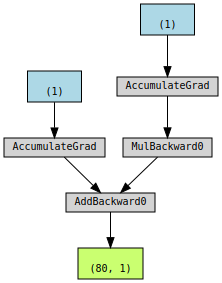

In [32]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
  dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
  dtype=torch.float, device=device)
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)

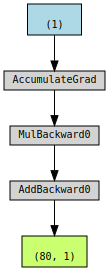

In [33]:
## Only tensors for which gradient is true is shown in graph.
## Now lets set b to non-gradients and lets check the results.
b_nograd = torch.randn(1, requires_grad=False, \
  dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
  dtype=torch.float, device=device)
yhat = b_nograd + w * x_train_tensor
make_dot(yhat)


##Lets use Optimizers

In [34]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr) 

for epoch in range(epochs):
  yhat = b + w*x_train_tensor

  error = (yhat - y_train_tensor)

  loss = (error **2).mean()

  loss.backward()

  ## Way1: Uopdating paremeters as per numpy
  ## It throws an error

  # b = b - lr*b.grad
  # w = w - lr*w.grad


  ## way2 -: it also throws an error

  # b -= lr*b.grad
  # w -= lr*w.grad

  ## way3

  # with torch.no_grad():
  #   b -= lr*b.grad
  #   w -= lr*w.grad

  ## performing gradient descent, keep in ind that, pytorch itself is performing the batch-gradient descent we dont need to do it.
  optimizer.step()

  # b.grad.zero_()
  # w.grad.zero_()

  optimizer.zero_grad()







print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## Lets use loss function

In [35]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr) 

loss_fn = nn.MSELoss(reduction="mean")

for epoch in range(epochs):
  yhat = b + w*x_train_tensor

  # error = (yhat - y_train_tensor)

  # loss = (error **2).mean()

  loss = loss_fn(yhat, y_train_tensor)

  loss.backward()

  ## Way1: Uopdating paremeters as per numpy
  ## It throws an error

  # b = b - lr*b.grad
  # w = w - lr*w.grad


  ## way2 -: it also throws an error

  # b -= lr*b.grad
  # w -= lr*w.grad

  ## way3

  # with torch.no_grad():
  #   b -= lr*b.grad
  #   w -= lr*w.grad

  ## performing gradient descent, keep in ind that, pytorch itself is performing the batch-gradient descent we dont need to do it.
  optimizer.step()

  # b.grad.zero_()
  # w.grad.zero_()

  optimizer.zero_grad()







print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [39]:
## Lets convert to nmumpy array

# loss.cpu().numpy()## failed
loss.detach().cpu().numpy()
## another ditect way
loss.item()
loss.tolist()

0.008044655434787273